<a href="https://colab.research.google.com/github/wqiu96/MA574_Portfolio-Valuation-and-Risk-Management/blob/master/src/Markowitz2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import *
import os

In [2]:
!git clone https://github.com/wqiu96/MA574_Portfolio-Valuation-and-Risk-Management.git

Cloning into 'MA574_Portfolio-Valuation-and-Risk-Management'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 158 (delta 7), reused 0 (delta 0), pack-reused 127
Receiving objects: 100% (158/158), 1.98 MiB | 2.25 MiB/s, done.
Resolving deltas: 100% (36/36), done.


In [3]:
cd MA574_Portfolio-Valuation-and-Risk-Management/src/project3/

/content/MA574_Portfolio-Valuation-and-Risk-Management/src/project3


In [0]:
#Load data
os.chdir('/content/MA574_Portfolio-Valuation-and-Risk-Management/src/project3/')
file_chdir = os.getcwd()
filecsv_list = []
for root,dirs,files in os.walk(file_chdir):
  for file in files:
    if os.path.splitext(file)[1] == '.csv' and os.path.splitext(file)[0] != 'VXX':
      filecsv_list.append(file)
R = pd.DataFrame()
for csv in filecsv_list:
  data = pd.read_csv(csv)
  #calculate return
  R[csv.strip('.csv')] = np.array([np.log(data['Adj Close'][j]/data['Adj Close'][j-1]) for j in range(1,len(data['Adj Close']))])
 

In [0]:
#Find the break points for every year
break_points = []
break_points.append(0)
break_points.append(data[data['Date'].isin(['2012-10-18'])].index[0])
break_points.append(data[data['Date'].isin(['2014-10-17'])].index[0])
break_points.append(data[data['Date'].isin(['2019-10-18'])].index[0])

In [6]:
break_points

[0, 757, 1258, 2517]

In [0]:
#Expected returns 
R_expect_1 = np.array(R[break_points[2]:break_points[3]].mean()).reshape(-1,1)
R_expect_2 = np.array(R[break_points[1]:break_points[3]].mean()).reshape(-1,1)
R_expect_3 = np.array(R[break_points[0]:break_points[3]].mean()).reshape(-1,1)

In [0]:
R_cov =  np.array(R[break_points[2]:break_points[3]].cov())
R_expect = R_expect_1
one = np.ones((len(R_expect),1))
A = np.dot(np.dot(one.reshape(1,-1),inv(R_cov)),R_expect)
B = np.dot(np.dot(R_expect.reshape(1,-1),inv(R_cov)),R_expect)
C = np.dot(np.dot(one.reshape(1,-1),inv(R_cov)),one)
D = B*C - A**2
g = (B * np.dot(inv(R_cov), one) - A* np.dot(inv(R_cov), R_expect))/D
h = (C * np.dot(inv(R_cov), R_expect) - A* np.dot(inv(R_cov), one))/D
min_sigma = np.dot(np.dot(g.reshape(1,-1),R_cov),g) - (np.dot(np.dot(h.reshape(1,-1),R_cov),g)**2)/np.dot(np.dot(h.reshape(1,-1),R_cov),h)

In [9]:
min_sigma

array([[4.41546999e-05]])

In [0]:
def effcientfrontier(g,h,R_cov,N1,N2):
  sigma = []
  mu = []
  weight = []
  before_ = np.inf
  for i in range(N1,N2):
      w = g + h*0.00000001*i
      sigma_ = 365*np.dot(np.dot(w.reshape(1,-1),R_cov),w)[0][0]
      if sigma_ > before_:
        sigma.append(np.sqrt((np.exp(sigma_)-1)*np.exp(2*0.00000001*i*365 + sigma_))*100)
        weight.append(w)
        mu.append((np.exp(0.00000001*i*365 + sigma_/2)-1)*100)
      before_ = sigma_
  return sigma,mu,weight

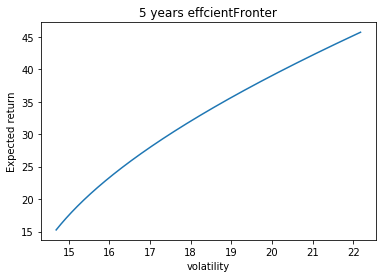

In [11]:
#5 years effcientFronter
sigma1,mu1,weight1 = effcientfrontier(g,h,R_cov,2000,100000)
plt.plot(sigma1,mu1)
plt.ylabel("Expected return")
plt.xlabel("volatility")
plt.title("5 years effcientFronter")
plt.show()

In [14]:
weight1[0] # weight for minimum variance(5 years)

array([[-0.12855934],
       [ 0.6480573 ],
       [-0.00943156],
       [-0.05970273],
       [-0.02773605],
       [-0.01347019],
       [-0.00276016],
       [-0.05464878],
       [ 0.07152214],
       [ 0.00443045],
       [ 0.01864847],
       [ 0.16789202],
       [ 0.13717967],
       [-0.01504378],
       [ 0.00143201],
       [ 0.19283443],
       [ 0.00402328],
       [ 0.00505374],
       [ 0.08146231],
       [-0.02118324]])

In [0]:
R_cov2 =  np.array(R[break_points[1]:break_points[3]].cov())
R_expect2 = R_expect_2
one = np.ones((len(R_expect2),1))
A2 = np.dot(np.dot(one.reshape(1,-1),inv(R_cov2)),R_expect2)
B2 = np.dot(np.dot(R_expect2.reshape(1,-1),inv(R_cov2)),R_expect2)
C2 = np.dot(np.dot(one.reshape(1,-1),inv(R_cov2)),one)
D2= B2*C2 - A2**2
g2 = (B2 * np.dot(inv(R_cov2), one) - A2* np.dot(inv(R_cov2), R_expect2))/D2
h2 = (C2 * np.dot(inv(R_cov2), R_expect2) - A2* np.dot(inv(R_cov2), one))/D2
min_sigma2 = np.dot(np.dot(g2.reshape(1,-1),R_cov2),g2) - (np.dot(np.dot(h2.reshape(1,-1),R_cov2),g2)**2)/np.dot(np.dot(h2.reshape(1,-1),R_cov2),h2)

In [16]:
min_sigma2

array([[4.31818385e-05]])

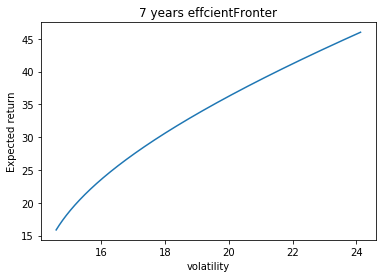

In [17]:
#7 years effcientFronter
sigma2,mu2,weight2 = effcientfrontier(g2,h2,R_cov2,2000,100000)
plt.plot(sigma2,mu2)
plt.ylabel("Expected return")
plt.xlabel("volatility")
plt.title("7 years effcientFronter")
plt.show()

In [23]:
weight2[0] # weight for minimum variance(7 years)

array([[-6.93179186e-02],
       [ 5.99811434e-01],
       [-2.53621100e-02],
       [-4.42244119e-02],
       [-1.90540571e-02],
       [ 3.95497992e-03],
       [-2.19866885e-02],
       [-5.10201433e-02],
       [ 4.29760306e-02],
       [-5.03605716e-03],
       [-4.21657729e-04],
       [ 1.48832736e-01],
       [ 1.70466763e-01],
       [-1.26938179e-02],
       [ 1.53035944e-02],
       [ 1.81950424e-01],
       [ 1.85801466e-03],
       [ 8.07425152e-03],
       [ 9.34071825e-02],
       [-1.75185472e-02]])

In [0]:
R_cov3 =  np.array(R[break_points[0]:break_points[3]].cov())
R_expect3 = R_expect_3
one = np.ones((len(R_expect3),1))
A3 = np.dot(np.dot(one.reshape(1,-1),inv(R_cov3)),R_expect3)
B3 = np.dot(np.dot(R_expect3.reshape(1,-1),inv(R_cov3)),R_expect3)
C3 = np.dot(np.dot(one.reshape(1,-1),inv(R_cov3)),one)
D3= B3*C3 - A3**2
g3 = (B3 * np.dot(inv(R_cov3), one) - A3* np.dot(inv(R_cov3), R_expect3))/D3
h3 = (C3 * np.dot(inv(R_cov3), R_expect3) - A3* np.dot(inv(R_cov3), one))/D3
min_sigma3 = np.dot(np.dot(g3.reshape(1,-1),R_cov3),g3) - (np.dot(np.dot(h3.reshape(1,-1),R_cov3),g3)**2)/np.dot(np.dot(h3.reshape(1,-1),R_cov3),h3)

In [0]:
min_sigma3

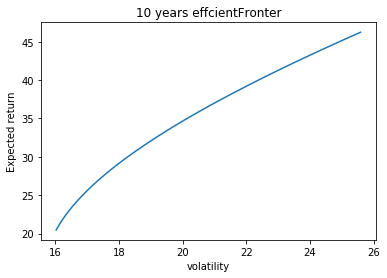

In [21]:
#10 years effcientFronter
sigma3,mu3,weight3 = effcientfrontier(g3,h3,R_cov3,2000,100000)
plt.plot(sigma3,mu3)
plt.ylabel("Expected return")
plt.xlabel("volatility")
plt.title("10 years effcientFronter")
plt.show()

In [24]:
weight3[0] # weight for minimum variance(10 years)

array([[-0.03568623],
       [ 0.51409865],
       [-0.01345146],
       [-0.01580097],
       [-0.01100529],
       [ 0.0197078 ],
       [-0.06916411],
       [-0.09160228],
       [ 0.0787964 ],
       [ 0.00340358],
       [-0.05779174],
       [ 0.17890328],
       [ 0.22115403],
       [-0.00411727],
       [ 0.01630456],
       [ 0.15656648],
       [-0.01145968],
       [-0.01207851],
       [ 0.15402707],
       [-0.02080432]])

In [0]:
R_copy = R.copy()
vxx = pd.read_csv('VXX.csv')
R_copy['VXX'] = np.array([((vxx['Adj Close'][j]/vxx['Adj Close'][j-1])-1) for j in range(1,len(vxx['Adj Close']))])

In [0]:
R_cov4 =  np.array(R_copy[break_points[2]:break_points[3]].cov())
R_expect4 = np.array(R_copy[break_points[2]:break_points[3]].mean()).reshape(-1,1)
one = np.ones((len(R_expect4),1))
A4 = np.dot(np.dot(one.reshape(1,-1),inv(R_cov4)),R_expect4)
B4 = np.dot(np.dot(R_expect4.reshape(1,-1),inv(R_cov4)),R_expect4)
C4 = np.dot(np.dot(one.reshape(1,-1),inv(R_cov4)),one)
D4= B4*C4 - A4**2
g4 = (B4 * np.dot(inv(R_cov4), one) - A4* np.dot(inv(R_cov4), R_expect4))/D4
h4 = (C4 * np.dot(inv(R_cov4), R_expect4) - A4* np.dot(inv(R_cov4), one))/D4
min_sigma4 = np.dot(np.dot(g4.reshape(1,-1),R_cov4),g4) - (np.dot(np.dot(h4.reshape(1,-1),R_cov4),g4)**2)/np.dot(np.dot(h4.reshape(1,-1),R_cov4),h4)

In [27]:
min_sigma4

array([[1.35645621e-05]])

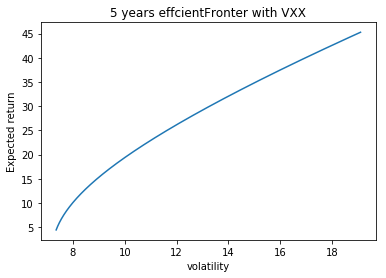

In [28]:
#5 years effcientFronter with VXX
sigma_v,mu_v,weight_v = effcientfrontier(g4,h4,R_cov4,2000,100000)
plt.plot(sigma_v,mu_v)
plt.ylabel("Expected return")
plt.xlabel("volatility")
plt.title("5 years effcientFronter with VXX")
plt.show()

In [0]:
rf = 0.0156 # Choose 5 year US treasury rate as risk free rate
def findTangent(R_cov, R_expect, rf):
  one = np.ones((len(R_expect),1))
  w_b = np.dot(inv(R_cov),(R_expect - rf*one))
  w_t = w_b/(np.dot(one.T,w_b))
  mu_T = np.dot(w_t.T,R_expect)
  mu_p = np.dot(w_b.T,R_expect) + (1 - np.dot(w_b.T,one))*rf
  cp = (mu_p - rf)/(np.dot(np.dot((R_expect - rf*one).T,inv(R_cov)),(R_expect - rf*one)))
  w_mp = cp * w_b

  return mu_T,w_t,w_b,w_mp
mu_T,w_t,w_b,w_mp = findTangent(R_cov4, R_expect4, rf)


In [31]:
sigma_T = np.dot(np.dot(w_t.reshape(1,-1),R_cov4),w_t)[0][0]
mu_annual = (np.exp(mu_T*365 + sigma_T/2)-1)*100
sigma_annual = np.sqrt((np.exp(sigma_T)-1)*np.exp(2*mu_T*365 + sigma_T))*100
k = (mu_annual - rf*100)/sigma_annual
print(k[0][0])

4.745841556150005


In [45]:
sigma_x = np.linspace(7,19,1000).reshape(-1,1)
targent_v =  k * sigma_x + rf*100
type(sigma_x)

numpy.ndarray

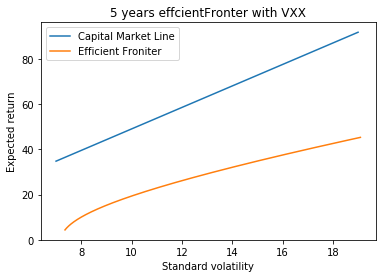

In [46]:
sigma_x = np.linspace(7,19,1000).reshape(-1,1)
targent_v = (k * sigma_x + rf*100).reshape(-1,1)
plt.plot(sigma_x,targent_v,label = "Capital Market Line")
plt.plot(sigma_v,mu_v,label = "Efficient Froniter")
plt.ylabel("Expected return")
plt.xlabel("Standard volatility")
plt.title("5 years effcientFronter with VXX")
plt.legend()
plt.show()


In [0]:
weight_ = weight[m]
weight_